In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data

Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  \
0     Bachelor           2/24/11         Employed      F   56274   
1     Bachelor           1/31/11       Unemployed      F       0   
2     Bachelor           2/19/11         Employed      F   48767   
3     Bachelor           1/20/11       Unemployed      M       0   
4     Bachelor            2/3/11         Employed      M   43836   
...        ...               ...              ...    ...     ...   
9129  Bachelor           2/10/11         Employed      M   71941   
9130   College           2/12/11         Employed      F   21604   
9131  Bachelor            2/6/11       Unemployed      M       0   
9132   College            2/3/11         Employed      M   21941   
9133   College           2/14/11       Unemployed      M       0   

     Location Code Marital Status  Monthly Premium Auto  \
0         Suburban        Married                    69   
1         Suburban         Single                    94   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
...            ...            ...                   ...   
9129         Urban        Married                    73   
9130      Suburban       Divorced                    79   
9131      Suburban         Single                    85   
9132      Suburban        Married                    96   
9133      Suburban         Single                    77   

      Months Since Last Claim  Months Since Policy Inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      Number of Open Complaints  Number of Policies     Policy Type  \
0                             0                   1  Corporate Auto   
1                             0                   8   Personal Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
...                         ...                 ...             ...   
9129                          0                   2   Personal Auto   
9130                          0                   1  Corporate Auto   
9131                          3                   2  Corporate Auto   
9132                          0                   3   Personal Auto   
9133                          0                   1 

In [5]:
# Standarising columns

data.columns = data.columns.str.lower().str.replace(' ', '_')

In [6]:
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [11]:
def funk(data):
    categoricals=data.select_dtypes('object')
    discrete=data.select_dtypes('int64')
    continuous=data.select_dtypes('float64')
    return categoricals,discrete,continuous

In [17]:
categoricals,discrete,continuous = funk(data)

In [14]:
data_corr = data.corr(method='spearman')
data_corr

customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.055395   
income                                        0.055395  1.000000   
monthly_premium_auto                          0.453933 -0.017608   
months_since_last_claim                       0.005126 -0.025784   
months_since_policy_inception                -0.002429 -0.001945   
number_of_open_complaints                    -0.031312  0.006334   
number_of_policies                            0.488860 -0.010273   
total_claim_amount                            0.210598 -0.401598   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.453933                 0.005126   
income                                    -0.017608                -0.025784   
monthly_premium_auto                       1.000000                -0.005989   
months_since_last_claim                   -0.005989                 1.000000   
months_since_policy_inception              0.014596                -0.048269   
number_of_open_complaints                 -0.012751                 0.005736   
number_of_policies                        -0.006936                 0.011439   
total_claim_amount                         0.522261                -0.000782   

                               months_since_policy_inception  \
customer_lifetime_value                            -0.002429   
income                                             -0.001945   
monthly_premium_auto                                0.014596   
months_since_last_claim                            -0.048269   
months_since_policy_inception                       1.000000   
number_of_open_complaints                          -0.013233   
number_of_policies                                 -0.009546   
total_claim_amount                                 -0.006569   

                               number_of_open_complaints  number_of_policies  \
customer_lifetime_value                        -0.031312            0.488860   
income                                          0.006334           -0.010273   
monthly_premium_auto                           -0.012751           -0.006936   
months_since_last_claim                         0.005736            0.011439   
months_since_policy_inception                  -0.013233           -0.009546   
number_of_open_complaints                       1.000000            0.001523   
number_of_policies                              0.001523            1.000000   
total_claim_amount                             -0.024694           -0.011100   

                               total_claim_amount  
customer_lifetime_value                  0.210598  
income                                  -0.401598  
monthly_premium_auto                     0.522261  
months_since_last_claim                 -0.000782  
months_since_policy_inception           -0.006569  
number_of_open_complaints               -0.024694  
number_of_policies                      -0.011100  
total_claim_amount                       1.000000

In [15]:
mask = np.zeros_like(data_corr)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data_corr, mask=mask, annot=True)
plt.show()

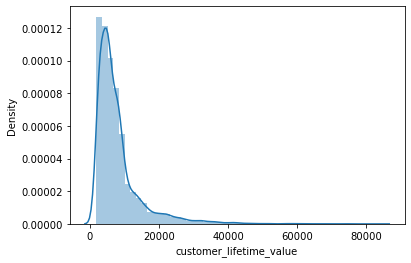

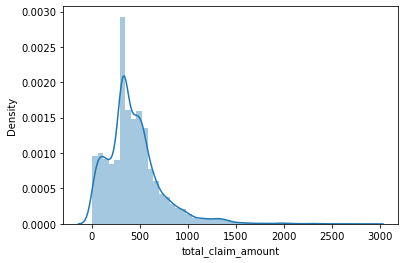

In [18]:
for column in continuous.columns:
    sns.distplot(continuous[column])
    plt.show()

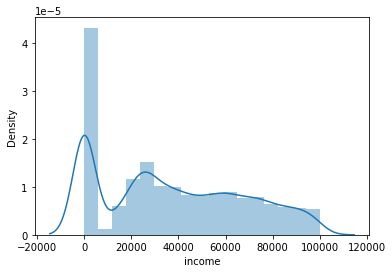

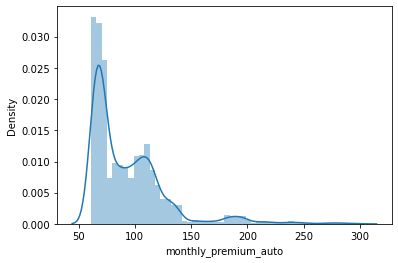

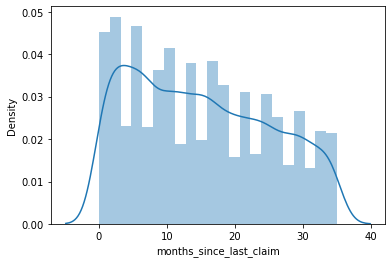

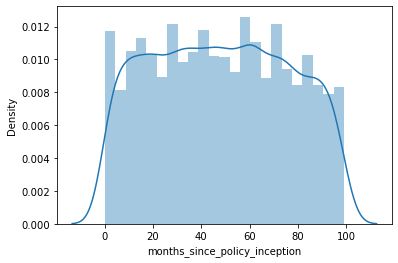

In [37]:
for column in discrete[['income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception']]:
    sns.distplot(discrete[column])
    plt.show()

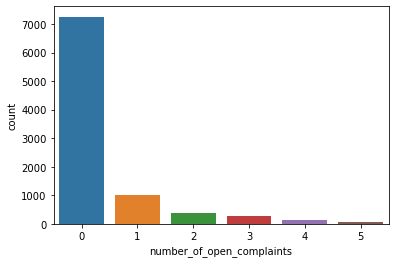

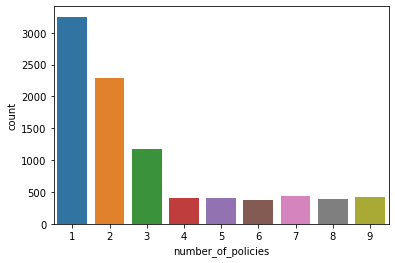

In [36]:
for column in discrete[['number_of_open_complaints','number_of_policies']]:
    sns.countplot(discrete[column])
    plt.show()

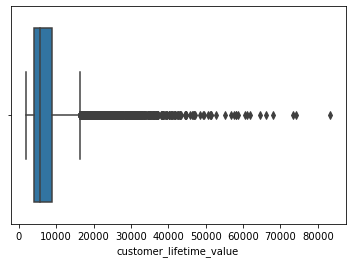

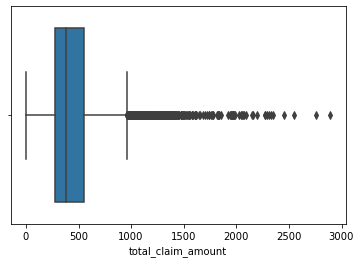

In [38]:
for column in continuous:
    sns.boxplot(continuous[column])
    plt.show()

In [39]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [40]:
data = data.set_index('customer')